# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/manuscript-v3.0-red?style=for-the-badge)](https://doi.org/10.1088/2399-6528/ac3204)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np
import os 
import sys

# qom modules
from qom.solvers.deterministic import HLESolver
from qom.solvers.measure import QCMSolver
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter
from qom.utils.loopers import wrap_looper
from qom.utils.solvers import get_func_quantum_correlation_measures, get_func_system_measures

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../..')))
# import system
from systems.Bidirectional import Bi_00
from systems.Unidirectional import Uni_00, Uni_01

# initialize logger
init_log()

MainThread               INFO    2024-01-10 00:09:49.886: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

Time evolution of quantum phase synchronization (blue) and Gaussian quantum discord (red) between the mechanical oscillators for bidirectional and unidirectional cases.
The dashed lines denote their time-averaged asymptotic values, defined $\langle S_{p} \rangle = \frac{1}{\Delta t} \int_{t}^{t + \Delta t} dt^{\prime} S_{p}(t^{\prime})$, where $\Delta t = 2 \pi \times 10 / \omega_{mL}$.
The parameters used are $\omega_{mR} = 1.01 \omega_{mL}$, $\Delta_{j}^{0} = \omega_{mj}$, $\gamma = \gamma_{j} = 0.005 \omega_{mL}$, $\kappa = \kappa_{j} = 0.15 \omega_{mL}$, $g_{j} = 0.005 \omega_{mL}$, $A_{l} = 52 \omega_{mL}$, $n_{th} = 0$, $\lambda = 0.075 \omega_{mL}$ and $\eta = 0.75$.

MainThread               INFO    2024-01-10 00:09:56.365: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 00:09:56.380: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


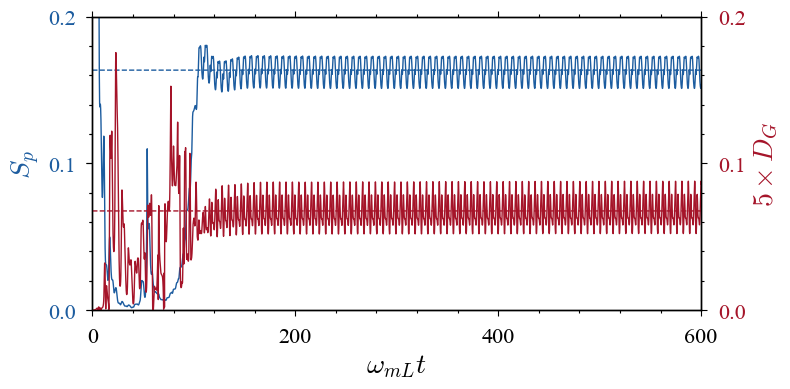

In [2]:
# parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'measure_codes' : ['sync_p', 'discord_G'],
        'indices'       : [1, 3],
        'ode_method'    : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001
    },
    'system': {
        'A_l'           : 52.0,
        'Delta_0_sign'  : 1.0, 
        'delta'         : 0.01,
        'g_0s'          : [0.005, 0.005],
        'gammas'        : [0.005, 0.005],
        'kappas'        : [0.15, 0.15],
        'lambda'        : 0.075,
        'n_ths'         : [0.0, 0.0],
        'omega_mL'      : 1.0
    },
    'plotter': {
        'type'                  : 'lines',
        'colors'                : [0, 0, -1, -1],
        'styles'                : ['-', '--'] * 2,
        'x_label'               : '$\\omega_{mL} t$',
        'x_tick_position'       : 'both-out',
        'x_ticks'               : [0, 200, 400, 600],
        'x_ticks_minor'         : [i * 40 for i in range(16)],
        'v_label'               : '$S_{p}$',
        'v_label_color'         : 0,
        'v_tick_color'          : 0,
        'v_tick_position'       : 'both-out',
        'v_ticks'               : [0, 0.1, 0.2],
        'v_ticks_minor'         : [i * 0.02 for i in range(11)],
        'v_twin_label'          : '$5 \\times D_{G}$',
        'v_twin_label_color'    : -1,
        'v_twin_tick_color'     : -1,
        'v_twin_tick_position'  : 'both-out',
        'v_twin_ticks'          : [0, 0.1, 0.2],
        'v_twin_ticks_minor'    : [i * 0.02 for i in range(11)],
        'width'                 : 8.0,
        'height'                : 4.0
    }
}

# initialize logger
init_log()

# initialize system
system = Bi_00(
    params=params['system']
)

# initialize solver
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
# get times, modes and correlations
T = hle_solver.get_times()
Modes, Corrs = hle_solver.get_modes_corrs()
# get quantum correlation measures
Measures = QCMSolver(
    Modes=Modes,
    Corrs=Corrs,
    params=params['solver']
).get_measures()

# extract required values
M_0 = Measures.transpose()[0]
M_0_avg = np.mean(M_0[9371:])
M_1 = Measures.transpose()[1] * 5
M_1_avg = np.mean(M_1[9371:])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[M_0, [M_0_avg] * len(T)],
    xs=T
)
plotter.update_twin_axis(
    vs=[M_1, [M_1_avg] * len(T)],
    xs=T
)
plotter.show()

MainThread               INFO    2024-01-10 00:10:05.245: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 00:10:05.262: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


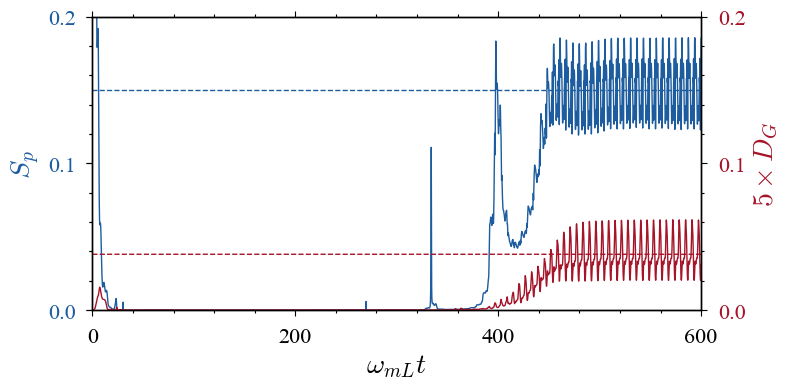

In [3]:
# parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'measure_codes' : ['sync_p', 'discord_G'],
        'indices'       : [1, 3],
        'ode_method'    : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001
    },
    'system': {
        'A_l'           : 52.0,
        'Delta_0_sign'  : 1.0, 
        'delta'         : 0.01,
        'eta'           : 0.75,
        'g_0s'          : [0.005, 0.005],
        'gammas'        : [0.005, 0.005],
        'kappas'        : [0.15, 0.15],
        'n_ths'         : [0.0, 0.0],
        'omega_mL'      : 1.0
    },
    'plotter': {
        'type'                  : 'lines',
        'colors'                : [0, 0, -1, -1],
        'styles'                : ['-', '--'] * 2,
        'x_label'               : '$\\omega_{mL} t$',
        'x_tick_position'       : 'both-out',
        'x_ticks'               : [0, 200, 400, 600],
        'x_ticks_minor'         : [i * 40 for i in range(16)],
        'v_label'               : '$S_{p}$',
        'v_label_color'         : 0,
        'v_tick_color'          : 0,
        'v_tick_position'       : 'both-out',
        'v_ticks'               : [0, 0.1, 0.2],
        'v_ticks_minor'         : [i * 0.02 for i in range(11)],
        'v_twin_label'          : '$5 \\times D_{G}$',
        'v_twin_label_color'    : -1,
        'v_twin_tick_color'     : -1,
        'v_twin_tick_position'  : 'both-out',
        'v_twin_ticks'          : [0, 0.1, 0.2],
        'v_twin_ticks_minor'    : [i * 0.02 for i in range(11)],
        'width'                 : 8.0,
        'height'                : 4.0
    }
}

# initialize logger
init_log()

# initialize system
system = Uni_00(
    params=params['system']
)

# initialize solver
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
# get times, modes and correlations
T = hle_solver.get_times()
Modes, Corrs = hle_solver.get_modes_corrs()
# get quantum correlation measures
Measures = QCMSolver(
    Modes=Modes,
    Corrs=Corrs,
    params=params['solver']
).get_measures()

# extract required values
M_0 = Measures.transpose()[0]
M_0_avg = np.mean(M_0[9371:])
M_1 = Measures.transpose()[1] * 5
M_1_avg = np.mean(M_1[9371:])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[M_0, [M_0_avg] * len(T)],
    xs=T
)
plotter.update_twin_axis(
    vs=[M_1, [M_1_avg] * len(T)],
    xs=T
)
plotter.show()

## Figure 4

Time-averaged quantum phase synchronization ($\langle S_{p} \rangle$) for bidirectional and unidirectional configurations.
To take into account the variable transient times and ascertain stability, the systems are simulated for $\omega_{mL} t = 10^{3}$ and $\omega_{mL} t = 10^{4}$ respectively.
The parameters used are the same as those in figure 2.

MainThread               INFO    2024-01-10 00:10:05.686: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 00:10:05.694: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


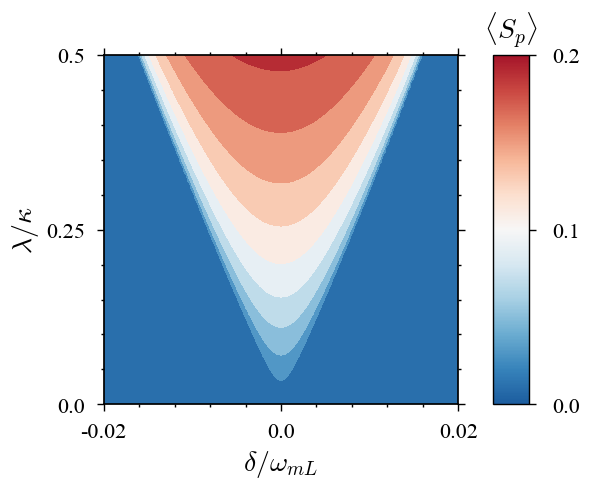

In [4]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.0_qom-v1.0.1/4a',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.02,
            'max'   : 0.02,
            'dim'   : 101
        },
        'Y'                 : {
            'var'   : 'lambda',
            'min'   : 0.0,
            'max'   : 0.1,
            'dim'   : 101
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'measure_codes' : ['sync_p'],
        'indices'       : [1, 3],
        'ode_method'    : 'vode',
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_index_min'   : 9371,
        't_index_max'   : 10000
    },
    'system': {
        'A_l'           : 52.0,
        'Delta_0_sign'  : 1.0, 
        'delta'         : 0.01,
        'g_0s'          : [0.005, 0.005],
        'gammas'        : [0.005, 0.005],
        'kappas'        : [0.15, 0.15],
        'lambda'        : 0.0375,
        'n_ths'         : [0.0, 0.0],
        'omega_mL'      : 1.0
    },
    'plotter': {
        'type'              : 'contourf',
        'x_label'           : '$\\delta / \\omega_{mL}$',
        'x_tick_position'   : 'both-out',
        'x_ticks'           : [-0.02, 0.0, 0.02],
        'x_ticks_minor'     : [i * 0.004 - 0.02 for i in range(11)],
        'y_label'           : '$\\lambda / \\kappa$',
        'y_tick_labels'     : [0.0, 0.25, 0.5],
        'y_tick_position'   : 'both-out',
        'y_ticks'           : [0.0, 0.0375, 0.075],
        'y_ticks_minor'     : [i * 0.0075 for i in range(11)],
        'show_cbar'         : True,
        'cbar_title'        : '$\\langle S_{p} \\rangle$',
        'cbar_ticks'        : [0.0, 0.1, 0.2],
        'width'             : 5.5
    }
}

# function to obtain quantum phase synchronization
def func(system_params):
    # get quantum correlation measures
    Measures = get_func_quantum_correlation_measures(
        SystemClass=Bi_00,
        params=params['solver'],
        steady_state=False
    )(system_params)
    # return average value
    return np.mean(Measures.transpose()[0])

# loop and plot
looper = wrap_looper(
    looper_name='XYLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

MainThread               INFO    2024-01-10 00:10:06.064: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 00:10:06.071: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


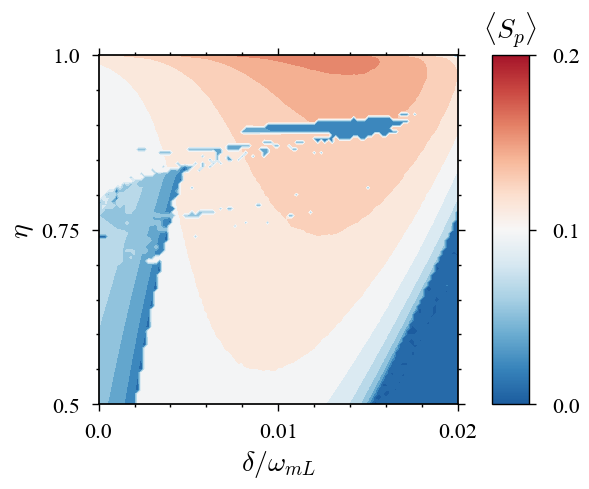

In [5]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.0_qom-v1.0.1/4b',
        'X'                 : {
            'var'   : 'delta',
            'min'   : 0.00,
            'max'   : 0.02,
            'dim'   : 101
        },
        'Y'                 : {
            'var'   : 'eta',
            'min'   : 0.5,
            'max'   : 1.0,
            'dim'   : 101
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'measure_codes' : ['sync_p'],
        'indices'       : [1, 3],
        'ode_method'    : 'vode',
        't_min'         : 0.0,
        't_max'         : 10000.0,
        't_dim'         : 100001,
        't_index_min'   : 99371,
        't_index_max'   : 100000
    },
    'system': {
        'A_l'           : 52.0,
        'Delta_0_sign'  : 1.0, 
        'delta'         : 0.01,
        'eta'           : 0.75,
        'g_0s'          : [0.005, 0.005],
        'gammas'        : [0.005, 0.005],
        'kappas'        : [0.15, 0.15],
        'n_ths'         : [0.0, 0.0],
        'omega_mL'      : 1.0
    },
    'plotter': {
        'type'              : 'contourf',
        'x_label'           : '$\\delta / \\omega_{mL}$',
        'x_tick_position'   : 'both-out',
        'x_ticks'           : [0.0, 0.01, 0.02],
        'x_ticks_minor'     : [i * 0.002 for i in range(11)],
        'y_label'           : '$\\eta$',
        'y_tick_position'   : 'both-out',
        'y_ticks'           : [0.5, 0.75, 1.0],
        'y_ticks_minor'     : [i * 0.05 + 0.5 for i in range(11)],
        'show_cbar'         : True,
        'cbar_title'        : '$\\langle S_{p} \\rangle$',
        'cbar_ticks'        : [0.0, 0.1, 0.2],
        'width'             : 5.5
    }
}

# function to obtain quantum phase synchronization
def func(system_params):
    # get quantum correlation measures
    Measures = get_func_quantum_correlation_measures(
        SystemClass=Uni_00,
        params=params['solver'],
        steady_state=False
    )(system_params)
    # return average value
    return np.mean(Measures.transpose()[0])

# loop and plot
looper = wrap_looper(
    looper_name='XYLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 5

Time-averaged quantum phase synchronization (dashed lines), Pearson correlation factor (solid blue circles), and largest TLE (solid red circles) for the unidirectional configuration for $\omega_{mL} t = 10^{4}$.
The dotted lines respectively represent the zeros for Pearson correlation factor and TLE.
The shaded regions (blue and red respectively) denote the areas where the difference of the number of phonons is positive.
The parameters used are the same as those in figure 2.

MainThread               INFO    2024-01-10 00:10:06.403: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 00:10:06.406: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


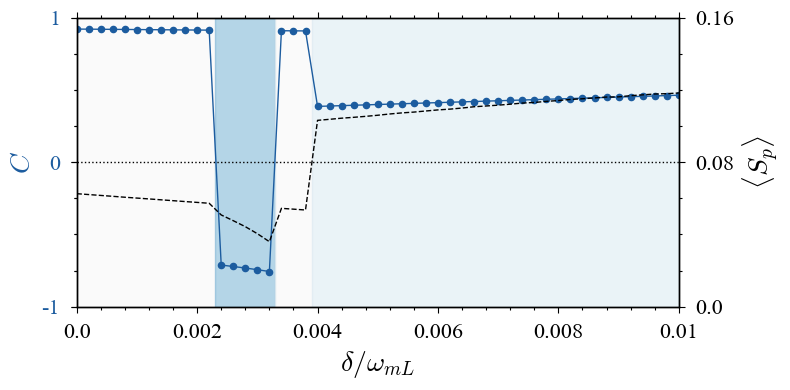

In [6]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.0_qom-v1.0.1/5a',
        'X'                 : {
            'var'   : 'delta',
            'min'   : 0.00,
            'max'   : 0.01,
            'dim'   : 51
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'measure_codes' : ['sync_p', 'corrs_P_p'],
        'indices'       : [1, 3],
        'ode_method'    : 'vode',
        't_min'         : 0.0,
        't_max'         : 10000.0,
        't_dim'         : 100001,
        't_index_min'   : 99371,
        't_index_max'   : 100000
    },
    'system': {
        'A_l'           : 52.0,
        'Delta_0_sign'  : 1.0, 
        'delta'         : 0.01,
        'eta'           : 0.75,
        'g_0s'          : [0.005, 0.005],
        'gammas'        : [0.005, 0.005],
        'kappas'        : [0.15, 0.15],
        'n_ths'         : [0.0, 0.0],
        'omega_mL'      : 1.0
    },
    'plotter': {
        'type'                  : 'lines',
        'colors'                : [0, 'k', 'k'],
        'styles'                : ['-', ':', '--'],
        'x_label'               : '$\\delta / \\omega_{mL}$',
        'x_tick_position'       : 'both-out',
        'x_ticks'               : [i * 0.002 for i in range(6)],
        'x_ticks_minor'         : [i * 0.0004 for i in range(26)],
        'v_label'               : '$C$',
        'v_label_color'         : 0,
        'v_tick_color'          : 0,
        'v_tick_position'       : 'both-out',
        'v_ticks'               : [-1, 0, 1],
        'v_ticks_minor'         : [i * 0.25 - 1.0 for i in range(9)],
        'v_twin_label'          : '$\\langle S_{p} \\rangle$',
        'v_twin_ticks'          : [0.00, 0.08, 0.16],
        'v_twin_tick_position'  : 'both-out',
        'v_twin_ticks_minor'    : [i * 0.02 for i in range(9)],
        'width'                 : 8.0,
        'height'                : 4.0,
        'vertical_spans'        : [
            {
                'limits': (0.0, 0.0023),
                'color' : 5,
                'alpha' : 0.5
            },
            {
                'limits': (0.0023, 0.0033),
                'color' : 2,
                'alpha' : 0.5
            },
            {
                'limits': (0.0033, 0.0039),
                'color' : 5,
                'alpha' : 0.5
            },
            {
                'limits': (0.0039, 0.01),
                'color' : 4,
                'alpha' : 0.5
            }
        ]
    }
}

# function to obtain quantum phase synchronization and pearson correlation coefficient
def func(system_params):
    # get quantum correlation measures
    Measures = get_func_quantum_correlation_measures(
        SystemClass=Uni_00,
        params=params['solver'],
        steady_state=False
    )(system_params)
    # return average value
    return np.mean(Measures, axis=0)

# looper
looper = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)

# extract values
xs = looper.axes['X']['val']
vs = np.transpose(looper.results['V'])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[vs[1], [0] * len(vs[1])],
    xs=xs
)
plotter.add_scatter(
    vs=vs[1],
    xs=xs,
    color=params['plotter']['colors'][0],
    size=20,
    style='o'
)
plotter.update_twin_axis(
    vs=vs[0],
    xs=xs
)
plotter.show()

MainThread               INFO    2024-01-10 00:10:06.809: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 00:10:06.813: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


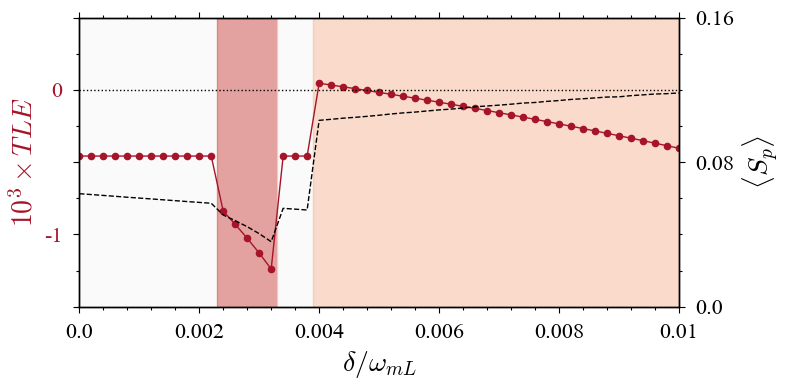

In [7]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.0_qom-v1.0.1/5b',
        'X'                 : {
            'var'   : 'delta',
            'min'   : 0.00,
            'max'   : 0.01,
            'dim'   : 51
        }
    },
    'solver': {
        'show_progress'         : False,
        'cache'                 : True,
        'measure_codes'         : ['sync_p'],
        'system_measure_name'   : 'A',
        'indices'               : [1, 3],
        'ode_method'            : 'vode',
        't_min'                 : 0.0,
        't_max'                 : 10000.0,
        't_dim'                 : 100001,
        't_index_min'           : 99371,
        't_index_max'           : 100000
    },
    'system': {
        'A_l'           : 52.0,
        'Delta_0_sign'  : 1.0, 
        'delta'         : 0.01,
        'eta'           : 0.75,
        'g_0s'          : [0.005, 0.005],
        'gammas'        : [0.005, 0.005],
        'kappas'        : [0.15, 0.15],
        'n_ths'         : [0.0, 0.0],
        'omega_mL'      : 1.0
    },
    'plotter': {
        'type'                  : 'lines',
        'colors'                : [-1, 'k', 'k'],
        'styles'                : ['-', ':', '--'],
        'x_label'               : '$\\delta / \\omega_{mL}$',
        'x_tick_position'       : 'both-out',
        'x_ticks'               : [i * 0.002 for i in range(6)],
        'x_ticks_minor'         : [i * 0.0004 for i in range(26)],
        'v_label'               : '$10^{3} \\times TLE$',
        'v_label_color'         : -1,
        'v_tick_color'          : -1,
        'v_limits'              : [-0.0015, 0.0005],
        'v_tick_labels'         : [-1, 0],
        'v_tick_position'       : 'both-out',
        'v_ticks'               : [-0.001, 0.0],
        'v_ticks_minor'         : [i * 0.0005 - 0.0015 for i in range(9)],
        'v_twin_label'          : '$\\langle S_{p} \\rangle$',
        'v_twin_ticks'          : [0.00, 0.08, 0.16],
        'v_twin_tick_position'  : 'both-out',
        'v_twin_ticks_minor'    : [i * 0.02 for i in range(9)],
        'width'                 : 8.0,
        'height'                : 4.0,
        'vertical_spans'        : [
            {
                'limits': (0.0, 0.0023),
                'color' : 5,
                'alpha' : 0.5
            },
            {
                'limits': (0.0023, 0.0033),
                'color' : -2,
                'alpha' : 0.5
            },
            {
                'limits': (0.0033, 0.0039),
                'color' : 5,
                'alpha' : 0.5
            },
            {
                'limits': (0.0039, 0.01),
                'color' : -4,
                'alpha' : 0.5
            }
        ]
    }
}

# function to obtain quantum phase synchronization and largest transverse Lyapunov exponent
def func(system_params):
    # get quantum correlation measures
    S_ps = get_func_quantum_correlation_measures(
        SystemClass=Uni_00,
        params=params['solver'],
        steady_state=False
    )(system_params)
    # return results
    m_00 = np.mean(S_ps, axis=0)[0]

    # get system measure
    As = get_func_system_measures(
        SystemClass=Uni_01,
        params=params['solver'],
        steady_state=False
    )(system_params)
    # get eigenvalues of the minus mode
    eigs, _ = np.linalg.eig(np.mean(As, axis=0))
    m_01 = np.max(np.real(eigs[6:8]))

    return np.array([m_00, m_01])

# looper
looper = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)

# extract values
xs = looper.axes['X']['val']
vs = np.transpose(looper.results['V'])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[vs[1], [0] * len(vs[1])],
    xs=xs
)
plotter.add_scatter(
    vs=vs[1],
    xs=xs,
    color=params['plotter']['colors'][0],
    size=20,
    style='o'
)
plotter.update_twin_axis(
    vs=vs[0],
    xs=xs
)
plotter.show()